In [9]:
# template.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 5

trotter_steps = 10
T = 1.0

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits)
qc = QuantumCircuit(qr, cr)

for i in range(n_qubits):
    qc.h(i)

for step in range(trotter_steps):
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 0, 1)
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 1, 2)
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 2, 3)
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 3, 4)

    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))

simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import RZGate, RZZGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
beta  = 0.1
n_qubits = 5

trotter_steps = 10
T = 1.0

qr = QuantumRegister(n_qubits)
cr = ClassicalRegister(n_qubits)
qc = QuantumCircuit(qr, cr)

for i in range(n_qubits):
    qc.h(i)

for step in range(trotter_steps):
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 0, 1)
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 1, 2)
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 2, 3)
    qc.rzz(-2 * gamma * 0.5 * (T / trotter_steps), 3, 4)

    for i in range(n_qubits):
        qc.rx(2 * beta, i)

qc.measure(range(n_qubits), range(n_qubits))

simulator = BasicSimulator()

compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

print(result.get_counts())


{'00001': 25, '10110': 34, '01101': 42, '00010': 39, '11101': 37, '01010': 74, '10011': 21, '01011': 34, '01001': 37, '00111': 22, '10010': 42, '10111': 41, '00100': 22, '00000': 22, '01110': 26, '11010': 49, '00011': 15, '11011': 40, '00101': 50, '10101': 62, '10001': 25, '01000': 30, '10100': 46, '01100': 15, '11001': 27, '01111': 25, '11000': 25, '10000': 27, '11111': 14, '11110': 14, '00110': 23, '11100': 19}
{'01100': 25, '10100': 52, '01101': 33, '10011': 26, '01011': 46, '01110': 22, '00000': 19, '00101': 41, '00001': 22, '11101': 38, '01001': 41, '00010': 29, '11001': 30, '11110': 21, '00011': 29, '10101': 63, '00111': 14, '01010': 67, '10111': 36, '11100': 18, '00100': 27, '11111': 21, '11010': 44, '10010': 44, '00110': 18, '01000': 29, '11000': 22, '10001': 33, '10110': 39, '11011': 31, '10000': 27, '01111': 17}


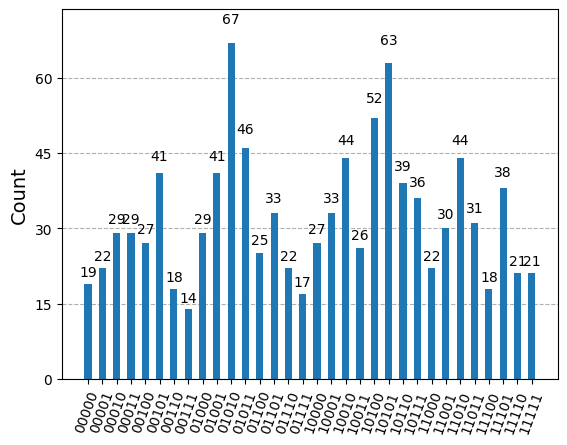

In [10]:
plot_histogram(result.get_counts())